Regarding Pitches

Gather the Data of World Cup Venues. 
Store and Analyze the Data of Venues.
How many mathces are played in those venues after 2012? 
Out of those, How many does each Team won?
What's the winning Percentage of WC Teams? 
Does Batting First or Second matters in these pitches?
What's the average Score necessary to win matches in these Venues?
Which Team gets benifit of these Pitches? 
What are average number of wickets taken per innigs in these Pitches?
What are highest Run Scoring Pitches? 



In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [44]:
Ground_Data = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\worldcup 2019 full prediction\Ground_Averages.csv')
ODI_Scores_Data = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\worldcup 2019 full prediction\ODI_Match_Totals.csv')
ODI_Results_Data = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\worldcup 2019 full prediction\ODI_Match_Results.csv')


In [45]:
Ground_Data.sample(6)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
44,"Darren Sammy National Cricket Stadium, Gros Is...",2013-2019,7,5,1,1,2255,84,2944,26.84,4.59
28,"Willowmoore Park, Benoni - South Africa",2013-2016,3,3,0,0,1312,40,1488,32.80,5.29
19,"National Cricket Stadium, St George's, Grenada...",2013-2019,7,6,0,1,3051,87,3346,35.06,5.47
12,"Punjab Cricket Association IS Bindra Stadium, ...",2013-2019,5,5,0,0,3056,67,2957,45.61,6.20
14,"Himachal Pradesh Cricket Association Stadium, ...",2013-2017,4,4,0,0,1664,56,1987,29.71,5.02
105,"Affies Park, Windhoek - Namibia",2019-2019,1,1,0,0,329,15,460,21.93,4.29


In [46]:
ODI_Scores_Data.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [47]:
ODI_Results_Data.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [48]:
ODI_Scores_Data.rename(columns = {'Unnamed: 0':'Scores_Id'}, inplace = True)
ODI_Scores_Data

,Scores_Id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7
1292,979,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1293,1296,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1294,550,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


In [49]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol",
                    "Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester",
                    "Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [50]:
WC_Ground_Stats = []

Ground_names = ODI_Scores_Data['Ground']
for i in Ground_names:
    for j in WC_venue_pitches:
        if i in j:
            WC_Ground_Stats.append((i, j))

In [51]:
Grounds_name = dict(set(WC_Ground_Stats))
def Full_Ground_name(value):
    return Grounds_name[value]
Grounds_name

{'Bristol': 'County Ground, Bristol',
 'Manchester': 'Old Trafford, Manchester',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 "Lord's": "Lord's, London",
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Leeds': 'Headingley, Leeds',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Birmingham': 'Edgbaston, Birmingham'}

In [52]:
#Let's gather the data of all ODI's in these WC Venues
WC_Ground_History = ODI_Scores_Data[ODI_Scores_Data['Ground'].isin(Ground[0] for Ground in WC_Ground_Stats)]
WC_Ground_History['Ground'] = WC_Ground_History['Ground'].apply(Full_Ground_name)
WC_Ground_History.head()

,Scores_Id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


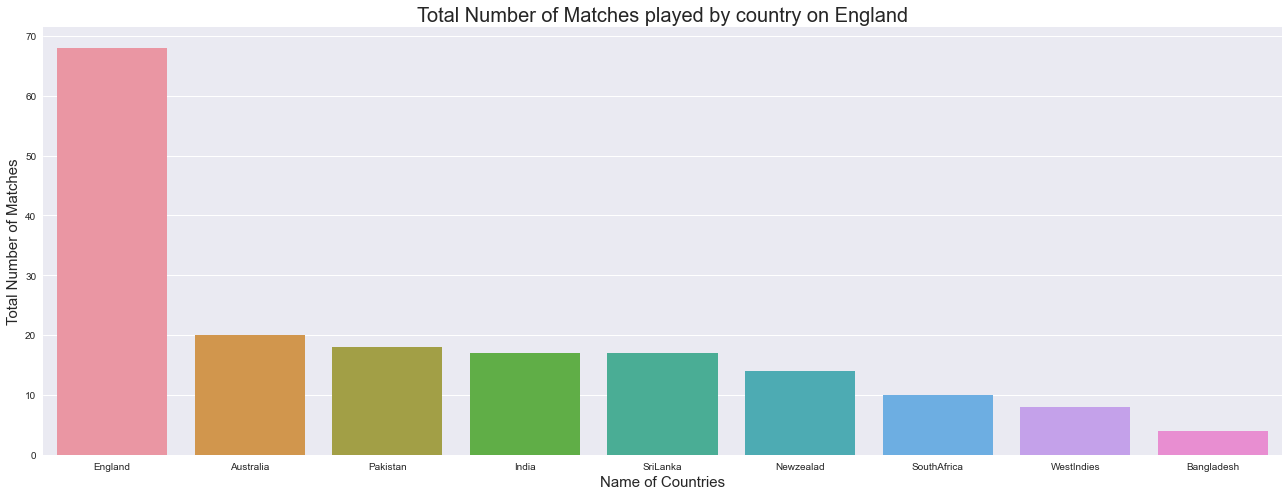

In [53]:
Team_Matches = WC_Ground_History['Country'].value_counts().reset_index()
Team_Matches.rename(columns = {'index':'Country_Name', 'Country':'Total Matches'}, inplace = True)
plt.figure(figsize = (18,7))
plt.style.use('seaborn')
sns.barplot(x = 'Country_Name', y = 'Total Matches', data = Team_Matches)
plt.title('Total Number of Matches played by country on England', fontsize = 20)
plt.xlabel('Name of Countries', fontsize = 15)
plt.ylabel('Total Number of Matches', fontsize = 15)
plt.tight_layout()
plt.show()

In [54]:
#----- Bar plot using plotly Express

px.bar(Team_Matches, x = 'Country_Name', y = 'Total Matches', color = 'Total Matches',  )

In [55]:
WC_Ground_History.sample(5)

,Scores_Id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
904,938,310,49.3,6.26,NaN,1,won,v New Zealand,"Sophia Gardens, Cardiff",6 Jun 2017,ODI # 3880,England,1
960,82,DNB,0.0,-,NaN,0,n/r,v England,"Trent Bridge, Nottingham",21 Sep 2017,ODI # 3913,WestIndies,4
302,870,219,48.1,4.54,NaN,1,lost,v Sri Lanka,"Edgbaston, Birmingham",3 Jun 2014,ODI # 3496,England,1
160,856,249,48.0,5.18,299.0,2,lost,v Australia,"Rose Bowl, Southampton",16 Sep 2013,ODI # 3416,England,1
919,233,236,49.2,4.78,NaN,1,lost,v Pakistan,"Sophia Gardens, Cardiff",12 Jun 2017,ODI # 3888,SriLanka,8


In [56]:
WC_Ground_History['Result'].value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [57]:
WC_Ground_History = WC_Ground_History[~WC_Ground_History['Result'].isin(['-'])]
WC_Ground_History['Result'].value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [58]:
winnings = WC_Ground_History[['Country', 'Result']]
winnings['count'] = 1
Ground_Result_Per_Team = winnings.groupby(['Country', 'Result']).sum()
Ground_Result_Per_Team  = Ground_Result_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Result_Per_Team.head()

,Country,Result,count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


<AxesSubplot:xlabel='Country', ylabel='count'>

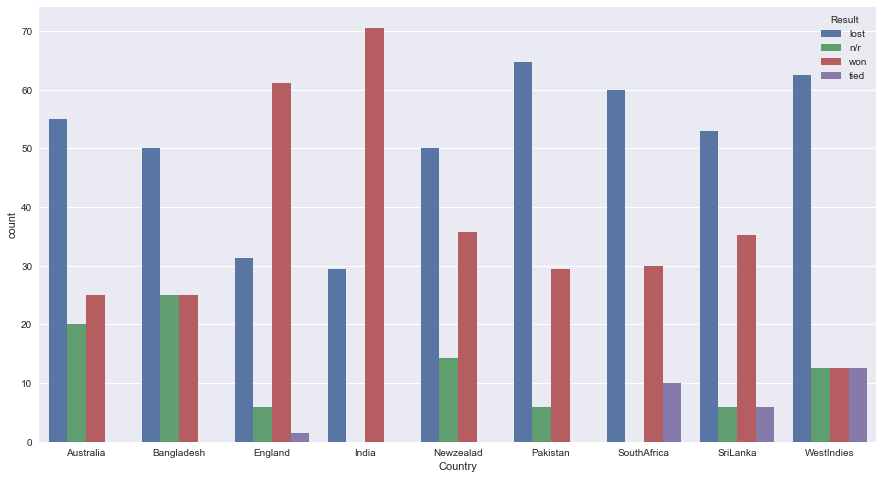

In [59]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Country', y ='count', hue = 'Result', data = Ground_Result_Per_Team)

<AxesSubplot:xlabel='index', ylabel='Result'>

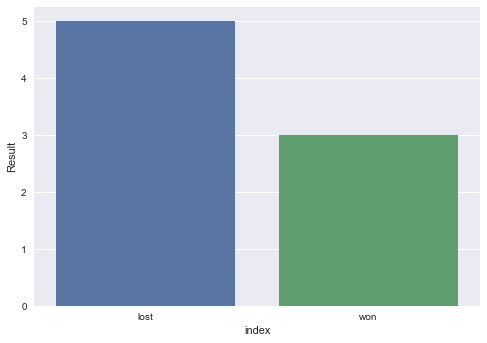

In [60]:
#India and England has highest winning so we will compare two teams

India_Vs_England = WC_Ground_History[WC_Ground_History['Country']=="England"][WC_Ground_History['Opposition'].str.contains('India')]
India_Vs_England = India_Vs_England['Result'].value_counts().reset_index()
sns.barplot(x= 'index', y = 'Result', data =India_Vs_England )

In [61]:
#-- plot using plotly Express
India_Vs_England.rename(columns = {'index':'Match Result', 'Result':'Total Matches'}, inplace = True)

px.bar(India_Vs_England, x = 'Match Result', y = 'Total Matches')

#Let's analyze the Win and Lose Percentage based on Innings wrt Stadium

In [62]:
WC_Ground_History.sample(6)

,Scores_Id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
94,126,297/3,47.1,6.29,294.0,2,won,v England,"The Oval, London",13 Jun 2013,ODI # 3370,SriLanka,8
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5
928,781,158,30.3,5.18,339.0,2,lost,v Pakistan,"The Oval, London",18 Jun 2017,ODI # 3894,India,6
970,85,288/6,50.0,5.76,NaN,1,lost,v England,"Rose Bowl, Southampton",29 Sep 2017,ODI # 3918,WestIndies,4
901,1043,182,44.3,4.08,NaN,1,n/r,v Australia,"The Oval, London",5 Jun 2017,ODI # 3879,Bangladesh,25
299,159,300/9,50.0,6.00,NaN,1,won,v England,"Lord's, London",31 May 2014,ODI # 3495,SriLanka,8


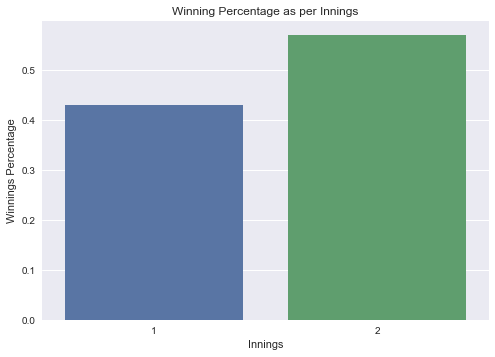

In [63]:
Innings_Win_percentage = WC_Ground_History[WC_Ground_History['Result'] == 'won']['Inns'].value_counts(normalize = True).reset_index()
sns.barplot(x= 'index', y = 'Inns', data = Innings_Win_percentage)
plt.xlabel('Innings')
plt.ylabel('Winnings Percentage')
plt.title('Winning Percentage as per Innings')
plt.show()

In [64]:
#----- Plot using plotly express

Innings_Win_percentage.rename(columns = {'index':'Innings', 'Inns':'Wining percentage'}, inplace = True)
px.bar(Innings_Win_percentage, x = 'Innings', y = 'Wining percentage', color = 'Innings',title = 'Winning Percentage as per Innings')


So, from the above figure, we can understand that,

Those Teams which Bowl First has won around 55% of the matches.
Let's Divide them by Pitches and see the history

In [65]:
Innings_pitches = WC_Ground_History[WC_Ground_History['Result'] == 'won'][['Inns', 'Ground']]
Innings_pitches['count'] = 1
Innings_pitches = Innings_pitches.groupby(['Ground', 'Inns']).sum()
Innings_pitches = Innings_pitches.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Innings_pitches.columns = ["Ground", "Inns","Wins"]
Innings_pitches

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000
5,"Headingley, Leeds",2,60.000000
6,"Lord's, London",1,57.142857
7,"Lord's, London",2,42.857143
8,"Old Trafford, Manchester",1,33.333333
9,"Old Trafford, Manchester",2,66.666667


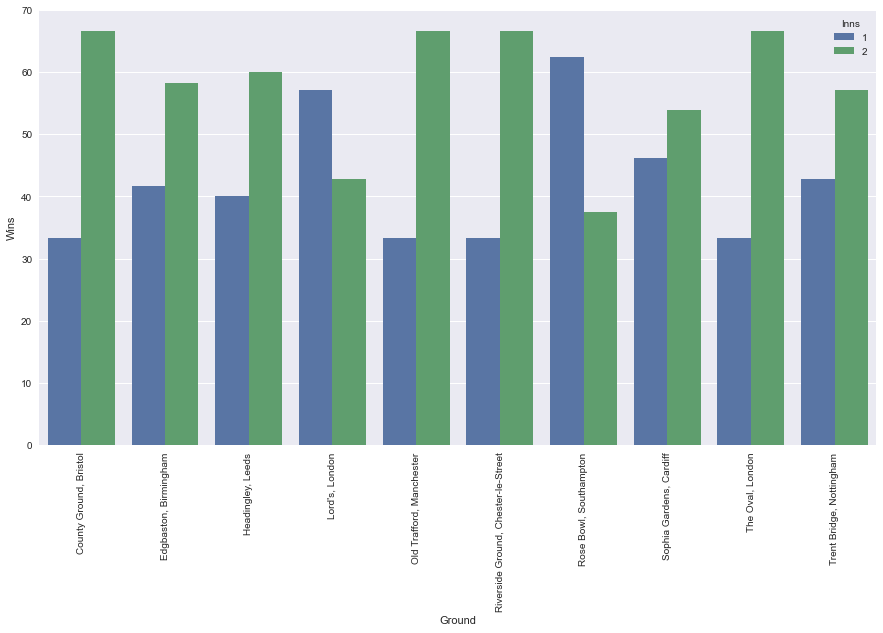

In [66]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Ground', y = 'Wins', hue = 'Inns', data = Innings_pitches)
plt.xticks(rotation = 90)
plt.show()

Now Let's analyze the Scores.

If a Team Bats First, How much should it score to win majority of times?
If a Team Bowls First, How much should the Bowling Team restrict the Runs?


In [67]:
WC_Ground_History = WC_Ground_History[~WC_Ground_History['Score'].str.contains('D')]

In [68]:
WC_Ground_History

,Scores_Id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,977,373/3,50.0,7.46,NaN,1,won,v Pakistan,"Rose Bowl, Southampton",11 May 2019,ODI # 4133,England,1
1286,548,358/9,50.0,7.16,NaN,1,lost,v England,"County Ground, Bristol",14 May 2019,ODI # 4135,Pakistan,7
1287,978,359/4,44.5,8.00,359.0,2,won,v Pakistan,"County Ground, Bristol",14 May 2019,ODI # 4135,England,1
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,"Trent Bridge, Nottingham",17 May 2019,ODI # 4138,Pakistan,7


In [69]:
scores = [int(item[0]) for item in WC_Ground_History['Score'].str.split('/')]
WC_Ground_History['Runs_without_wicket'] = scores
WC_Ground_History

,Scores_Id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Runs_without_wicket
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,231
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,227
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,359
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,273
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,977,373/3,50.0,7.46,NaN,1,won,v Pakistan,"Rose Bowl, Southampton",11 May 2019,ODI # 4133,England,1,373
1286,548,358/9,50.0,7.16,NaN,1,lost,v England,"County Ground, Bristol",14 May 2019,ODI # 4135,Pakistan,7,358
1287,978,359/4,44.5,8.00,359.0,2,won,v Pakistan,"County Ground, Bristol",14 May 2019,ODI # 4135,England,1,359
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,"Trent Bridge, Nottingham",17 May 2019,ODI # 4138,Pakistan,7,340


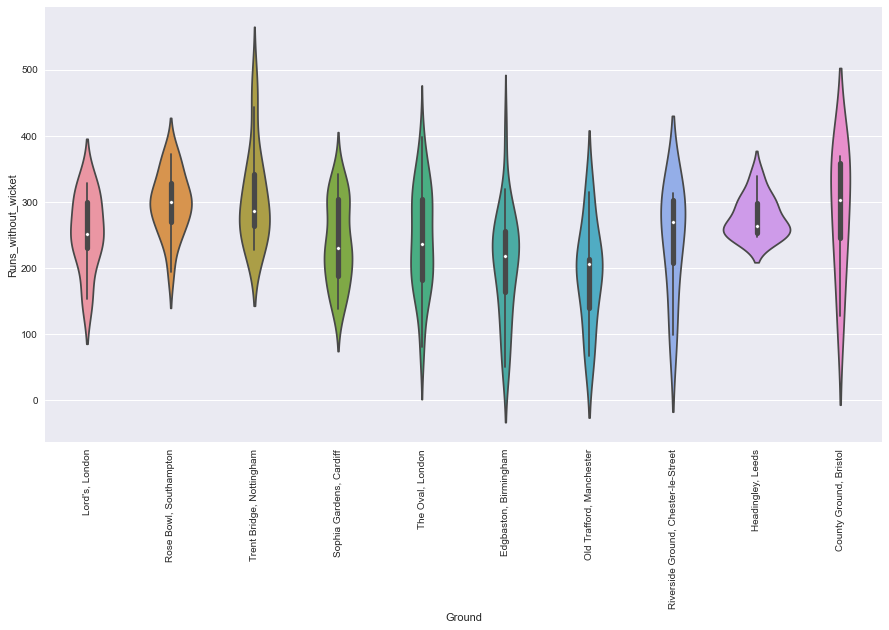

In [70]:
stadium_wise_score = WC_Ground_History[['Runs_without_wicket', 'Ground']]
stadium_wise_score = stadium_wise_score[stadium_wise_score['Runs_without_wicket'] >50]
plt.figure(figsize = (15,8))
#sns.barplot(x = 'Ground', y = 'Runs_without_wicket', hue = 'Result' ,data = stadium_wise_score)
sns.violinplot(x = 'Ground', y = 'Runs_without_wicket', data = stadium_wise_score)
plt.xticks(rotation = 90)
plt.show()

Trent Bridge, Nottingham, County Ground, Bristol and Headingley, Leeds are good scoring Pitches
Now we will find the mean for the total score

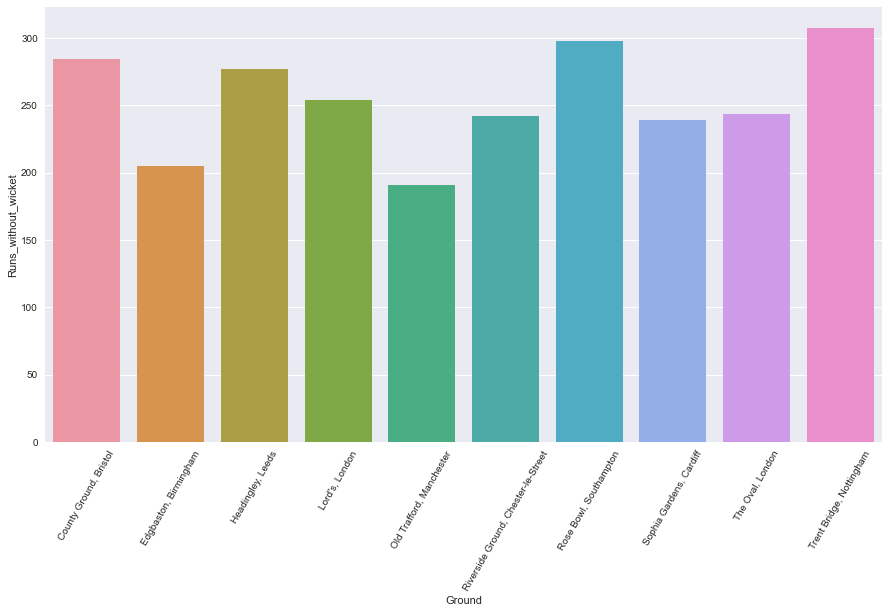

In [71]:
stadium_wise_score = stadium_wise_score[stadium_wise_score['Runs_without_wicket'] >50]
stadium_wise_score = stadium_wise_score.groupby('Ground').mean().reset_index()
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Ground', y = 'Runs_without_wicket' ,data = stadium_wise_score)
plt.xticks(rotation = 60)
plt.show()

In [72]:
px.bar(stadium_wise_score, x = 'Ground', y = 'Runs_without_wicket', color = 'Runs_without_wicket', title = 'Total Mean Score of the Match')

From above we can say that
Trent Bridge, Nottingham, has an average score around 300. It shows that,
Teams which play here can benifit much by scoring runs.
If the team takes quick wickets and win by huge margin,
then run rate will be more which can help in getting into semis.

In [73]:
def number_of_wickets(value):
    if '/' not in value:
        return 10
    elif 'D' in value:
        return 0
    else:
        return int(value.split('/')[1])

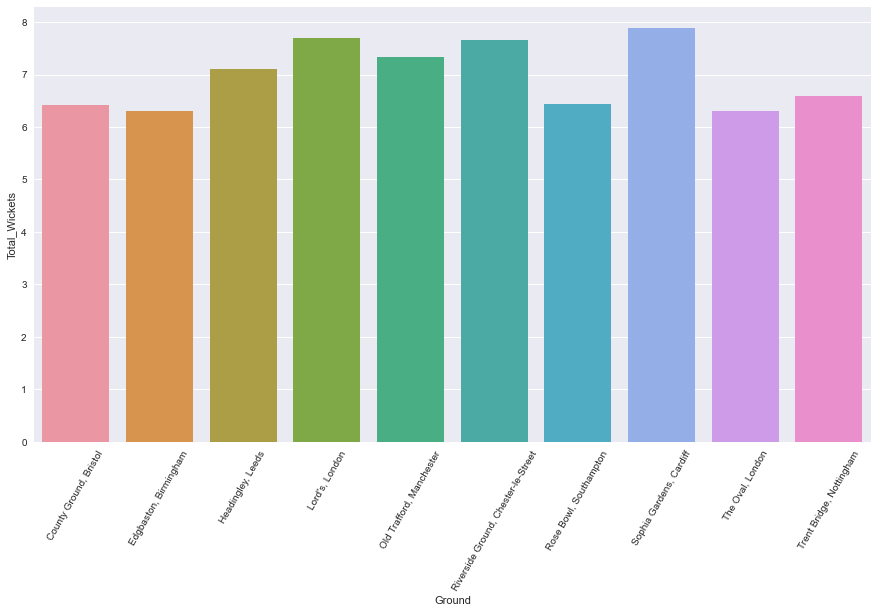

In [81]:
WC_Ground_History['Total_Wickets'] = WC_Ground_History['Score'].apply(number_of_wickets)
Wickets_in_Stadium = WC_Ground_History[['Ground', 'Total_Wickets']]
Wickets_in_Stadium = Wickets_in_Stadium.groupby('Ground').mean().reset_index()
plt.figure(figsize = (15,8))
sns.barplot(x = 'Ground', y = 'Total_Wickets', data = Wickets_in_Stadium)
plt.xticks(rotation = 60)
plt.show()

In [75]:
Grounds = WC_Ground_History['Ground'].unique()
country = WC_Ground_History['Country'].unique()
Ground_wins = {}
for Ground in Grounds:
    Ground_wins.update({Ground : {}})
    for teams in country:
        Country_Ground_Record  = WC_Ground_History[(WC_Ground_History['Country'] == teams) & (WC_Ground_History['Ground'] == Ground)]
        
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record['Result'] == 'won'])
        winning_per = matches_won/ matches_played*100
        Ground_wins[Ground].update({teams : {
            "matches_played" : matches_played, "matches_won": matches_won,"winning_percentage" : winning_per
        }}) 
        
Ground_wins["Lord's, London"]   
    

{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

In [76]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_wins.items():
    
    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [77]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Edgbaston, Birmingham'),
  Text(6, 0, 'Old Trafford, Manchester'),
  Text(7, 0, 'Riverside Ground, Chester-le-Street'),
  Text(8, 0, 'Headingley, Leeds'),
  Text(9, 0, 'County Ground, Bristol')])

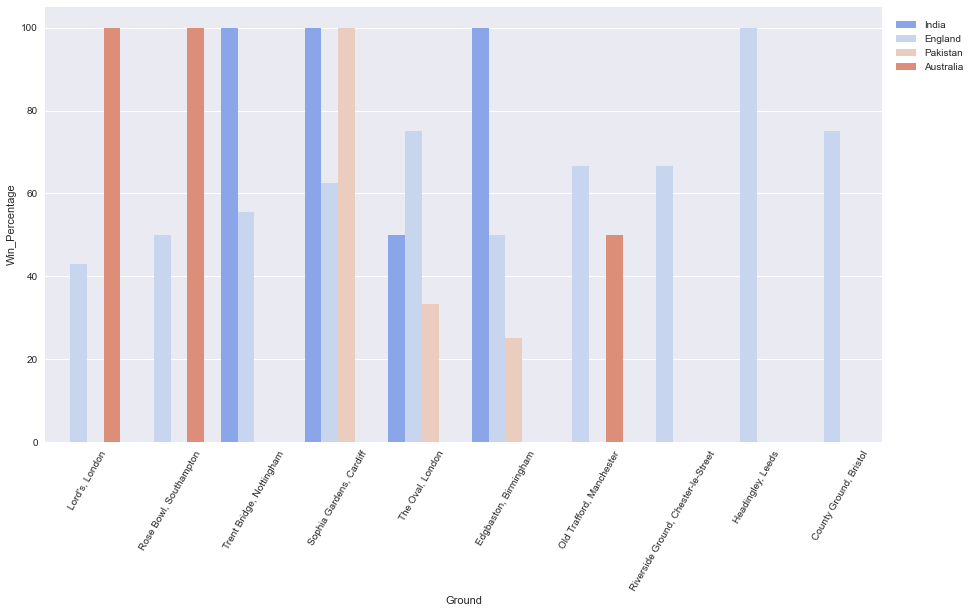

In [78]:
Pitch_Team_Winnings
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"], palette='coolwarm')
plt.legend(bbox_to_anchor = (1.0,1), borderaxespad = 1)
plt.xticks(rotation = 60)